In [29]:
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
df = pd.read_excel("Data-NB.xlsx")
df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,Low,C-
4,7.25,24,30.0,Male,High,C-


In [31]:
df['Gender']=df['Gender'].str.strip()
df['Gender']=df['Gender'].str.replace("Mle", "Male")
df['Gender'].describe()

count        500
unique         2
top       Female
freq         302
Name: Gender, dtype: object

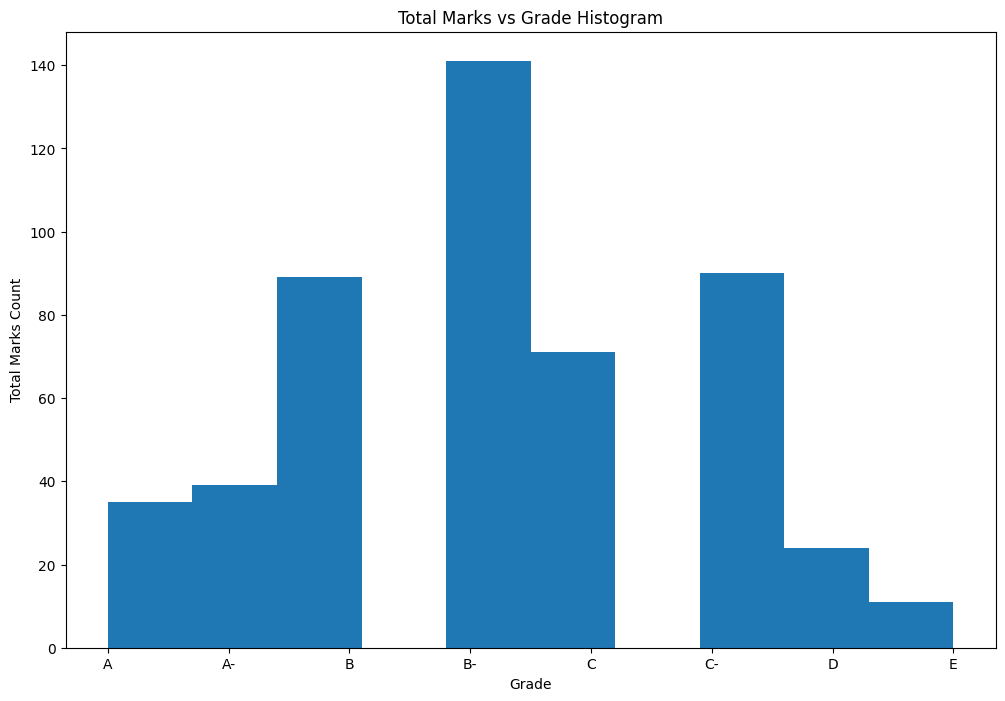

In [32]:
df_sorted = df.sort_values(by='Grade')
plt.figure(figsize=(12, 8))
plt.hist(data=df_sorted, x='Grade')
plt.xlabel('Grade')
plt.ylabel('Total Marks Count')
plt.title('Total Marks vs Grade Histogram')
plt.show()

In [33]:
#Encoding the values
grade_mapping = {'A': 0, 'A-': 1, 'B': 2, 'B-': 3, 'C': 4, 'C-': 5, 'D': 6, 'E': 7}
gender_mapping = {'Male': 0, 'Female': 1}
attendance_mapping = {'High': 0, 'Moderate': 1, 'Low': 2}

# Map the columns to numerical values

df['Grade'] = df['Grade'].map(grade_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Attendance'] = df['Attendance'].map(attendance_mapping)

Correlation Matrix for Data-NB

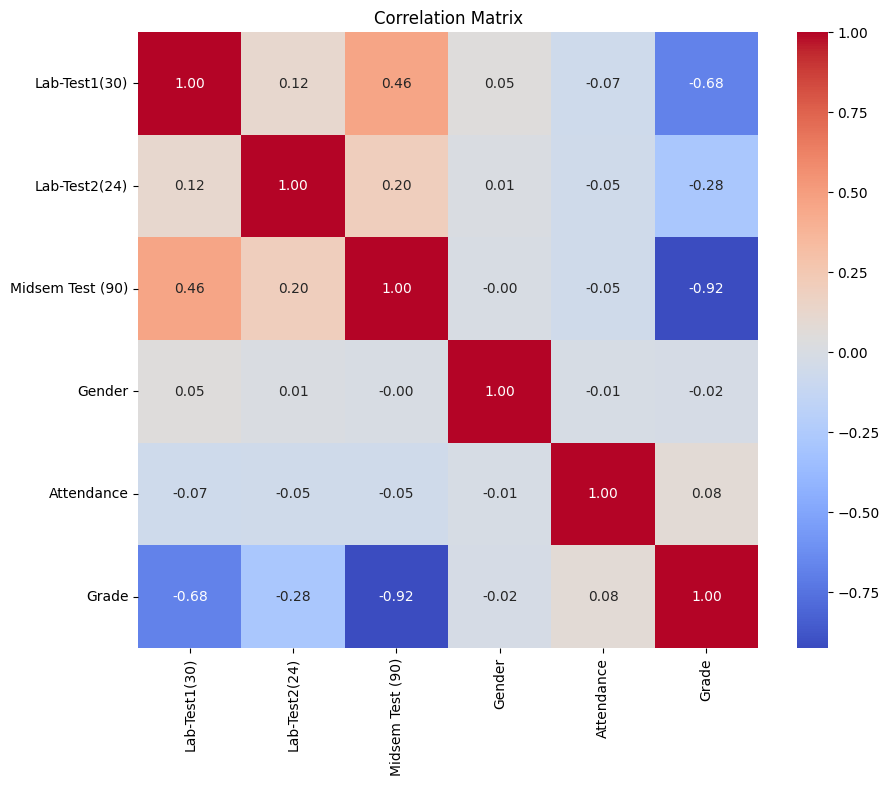

In [34]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

We see that there is a high correlation between 'Grade' and 'Midsem Test(90)', which is why we are getting comparatively lower accuracy for GNB (which assumes that the features of the dataset are independent)

In [35]:
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,0,0,0
1,15.00,24,67.0,1,0,0
2,5.25,24,45.0,0,0,3
3,2.75,19,34.0,0,2,5
4,7.25,24,30.0,0,0,5
...,...,...,...,...,...,...
495,10.50,24,48.0,0,2,3
496,11.00,24,31.0,1,1,4
497,11.75,24,47.0,0,0,3
498,0.00,20,0.0,1,2,7


Gaussian Naïve Bayes Classifier (80-20 Split)

In [36]:
X = df.drop(['Grade'], axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       0.95      0.90      0.93        21
           3       0.67      0.92      0.77        24
           4       0.78      0.41      0.54        17
           5       0.94      0.94      0.94        17
           6       0.57      0.80      0.67         5
           7       1.00      0.33      0.50         3

    accuracy                           0.82       100
   macro avg       0.86      0.79      0.79       100
weighted avg       0.84      0.82      0.81       100



Accuracy for Gaussian Naïve Bayes Classifier = 82%

In [37]:
y_pred

array([4, 4, 6, 4, 3, 2, 2, 3, 3, 4, 2, 3, 3, 6, 5, 1, 3, 5, 5, 3, 1, 3,
       5, 2, 3, 0, 3, 7, 5, 3, 2, 0, 6, 3, 1, 3, 3, 5, 3, 2, 3, 3, 2, 2,
       0, 5, 2, 4, 5, 5, 3, 4, 6, 2, 3, 2, 2, 5, 3, 3, 5, 4, 4, 6, 3, 3,
       5, 0, 3, 5, 2, 0, 3, 6, 0, 3, 3, 0, 0, 5, 3, 5, 0, 2, 2, 2, 5, 2,
       1, 3, 3, 3, 3, 6, 4, 2, 2, 3, 5, 2])

Confusion Matrix for GNB

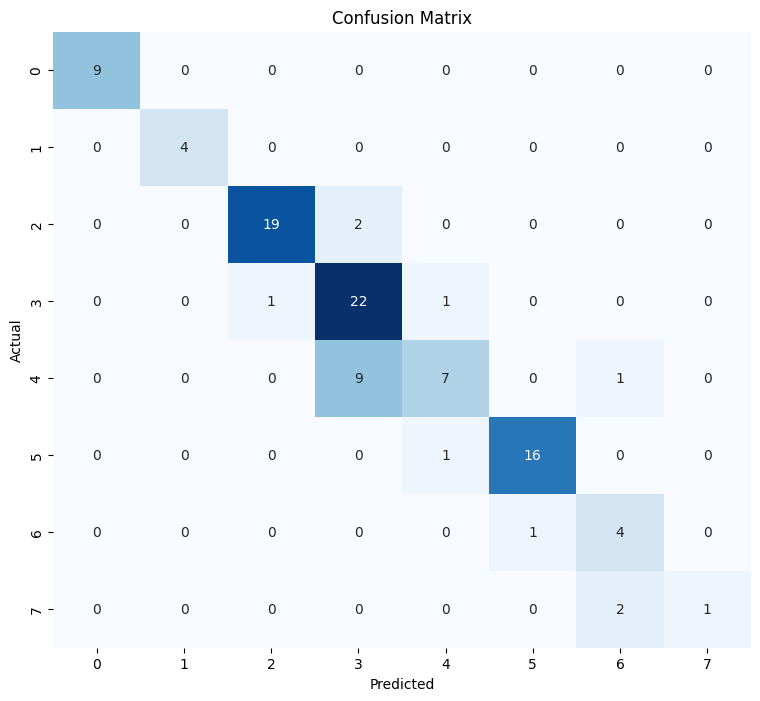

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier (80-20 split)


In [39]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      0.95      0.98        21
           3       0.88      0.96      0.92        24
           4       0.81      0.76      0.79        17
           5       0.75      0.88      0.81        17
           6       0.67      0.40      0.50         5
           7       1.00      0.67      0.80         3

    accuracy                           0.88       100
   macro avg       0.89      0.83      0.85       100
weighted avg       0.88      0.88      0.88       100



Accuracy for RF = 88%

Gradient Boosted Decision Tree (80-20 split)

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [41]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import tf_keras

GBDT for Data-NB

In [64]:
import warnings
warnings.filterwarnings ('ignore')
os.environ['TF_USE_LEGACY_KERAS'] = '1'
def split_dataset (df, test_ratio=0.20, random_state=42):
  test_indices = np.random.rand(len(df)) < test_ratio
  return df [~test_indices], df[test_indices]
train_ds_pd, test_ds_pd = split_dataset(df)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")
model_2 = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION)
model_2.fit(train_ds)
model_2.compile(metrics=["accuracy"])
evaluation_gbdt = model_2.evaluate(test_ds, return_dict=True)
for name, value in evaluation_gbdt.items():
    print(f"{name}: {value:.8f}")

Use /tmp/tmppu7fx5cx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.301341. Found 390 examples.
Training model...
Model trained in 0:00:00.495188
Compiling model...
Model compiled.
1/1 [==============================] - 0s 422ms/step - loss: 0.0000e+00 - accuracy: 0.9364
loss: 0.00000000
accuracy: 0.93636364


Accuracy for GBDT = 93.64%

**Hence, we observe that,<br> Accuracy: GBDT > RF > GNB**



*    Both GBDT and RF are ensemble learning methods, where multiple models
 (decision trees in this case) are combined to improve predictive performance. GNB, on the other hand, is a simpler probabilistic model that assumes independence between features. The lower accuracy of GNB compared to GBDT and RF may indicate that the dataset's underlying patterns are better captured by ensemble methods.
*   GNB assumes feature independence and works well with relatively simple, well-separated datasets. If GNB's accuracy is significantly lower than GBDT and RF, it could suggest that the dataset's features are not well-modeled by these independence assumptions. GNB might be more suitable for datasets where features are indeed independent or nearly independent.<br> (We see that there is a high correlation between 'Midsem marks' and 'Grade')


Gaussian NB for Iris Dataset (80-20 split)

In [43]:
iris = pd.read_csv("Iris.csv")

In [44]:
# Define a mapping for grades to numerical values
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2 }
# Map the 'Grade' column to numerical values
iris['species'] = iris['species'].map(species_mapping)

In [45]:
XI = iris.iloc[:,:3].values
yI = iris['species']
# Display the first 3 examples.
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
XI_train, XI_test, yI_train, yI_test = train_test_split(XI, yI, test_size = 0.2, random_state=42)
sc = StandardScaler()
XI_train = sc.fit_transform(XI_train)
XI_test = sc.transform(XI_test)
classifier = GaussianNB()
classifier.fit(XI_train, yI_train)
yI_pred = classifier.predict(XI_test)
class_report = classification_report(yI_test, yI_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Correlation Matrix for Iris Dataset


<Axes: >

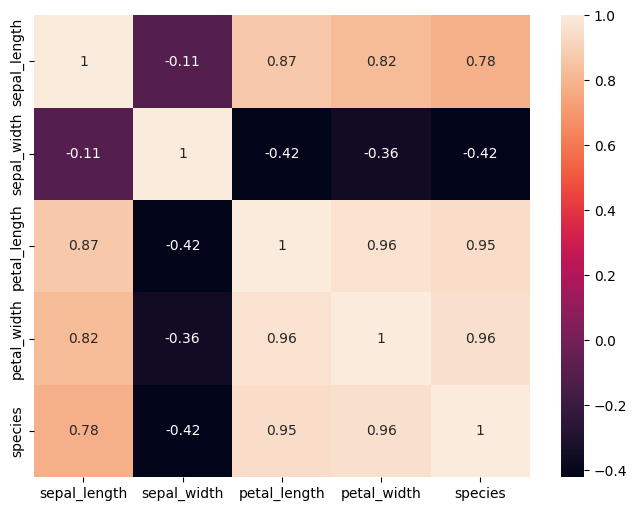

In [47]:
plt.figure(figsize=(8,6))
iris_corr = iris.corr()
sns.heatmap(iris_corr, annot=True)

We see that there is little to no correlation between the features of the dataset, which is why we are getting high accuracy of 97% for Gaussian Naive Bayes classifier.

Visualising Iris Image Dataset using plt.imshow()

In [48]:
!unzip archive

Archive:  archive.zip
replace iris-setosa/iris-01ab65973fd487a6cee4c5af1551c42b264eec5abab46bffd7c307ffef647e11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

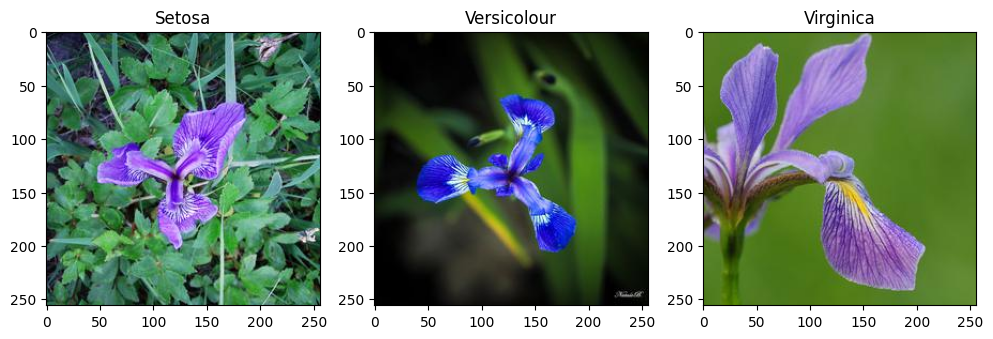

In [49]:
virginimg = random.choice(os.listdir("/content/iris-virginica"))
setosaimg = random.choice(os.listdir("/content/iris-setosa"))
versiimg = random.choice(os.listdir("/content/iris-versicolour"))
setosaPath = "/content/iris-setosa"
versicolourPath = "/content/iris-versicolour"
virginicaPath = "/content/iris-virginica"
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(mpimg.imread(f"{setosaPath}/{setosaimg}"))
plt.title('Setosa')
plt.subplot(1, 3, 2)
plt.imshow(mpimg.imread(f"{versicolourPath}/{versiimg}"))
plt.title('Versicolour')
plt.subplot(1, 3, 3)
plt.imshow(mpimg.imread(f"{virginicaPath}/{virginimg}"))
plt.title('Virginica')
plt.show()